In [125]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [126]:
#import the file sales_data from downloads
df = pd.read_csv(R'C:\Users\hanna\Downloads\sales_data.csv')

In [127]:
#call the data set
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


The Price column is not very specific and could potentially be confused as price per unit instead of the order total, so I will rename it to Total Price.

In [128]:
#rename the Price column to Total Price and call data set with change
df = df.rename(columns = {'Price' : 'Total Price'})
df

,Product,Region,Total Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [129]:
#get the info for the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      947 non-null    object 
 1   Region       946 non-null    object 
 2   Total Price  945 non-null    float64
 3   Units Sold   946 non-null    float64
 4   Sale Date    1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Observe that column 'Sale Date' does not have missing values, all other columns have many missing values.

In [130]:
#get description of the data set
df.describe()

,Total Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [131]:
#get description for the entire data set
df.describe(include = 'all')

,Product,Region,Total Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


Observations:  
- There are 50 different product types and 10 different regions.
- The product that sold the most was Product_45 (28 times) and the region that sold the most often was Region_9 (109 times).
- The price mean = $107.60, but min = $0.2 and max = $2,143.30, so these may be outliers.
- The price standard deviation is high, meaning that there is a large variability in prices.
- The median price is lower than the mean at $73.13. Median is less affected by outliers than mean is.
- The mean number of units sold = 10.05, the min = 2, the max = 22, and the standard deviation = 3.17, meaning that there is a less spread-out distribution of products sold.
- The median number of units sold is very similar to the mean, at 10 units sold.


In [132]:
#replace the missing values in the Region column
df['Region'].fillna('Region_Unknown', inplace = True)

As we will be analyzing sales of products by region in order to give recommendations, I did not want to drop the rows that had missing values in the region column in order to keep the data set more complete.

In [133]:
#replace the missing values in the Product column
df['Product'].fillna('Product_Unknown', inplace = True)

As we will be analyzing sales of products by region in order to give recommendations, I did not want to drop the rows that had missing values in the product column in order to keep the data set more complete.

In [134]:
#make a copy of the data set 
df2 = df.copy()

In [135]:
#replace the missing values in the Units Sold column with the average number of units sold per product category
df2['Units Sold'].fillna(df2.groupby('Product')['Units Sold'].transform('mean'), inplace = True)

In [136]:
#replace the missing values in the Total Price column with the average price per product category
df2['Total Price'].fillna(df2.groupby('Product')['Total Price'].transform('mean'), inplace = True)

I used a different method (mean) to fill the missing values in the Units Sold and Total Price column as that the data will be easier to analyze. There are a lot of missing vslues, so I did not want to delete all of them.

In [137]:
#call data set to ensure there are no more missing observations
df2.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      1050 non-null   object 
 1   Region       1050 non-null   object 
 2   Total Price  1050 non-null   float64
 3   Units Sold   1050 non-null   float64
 4   Sale Date    1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [138]:
#make a copy of the data set and drop any duplicates
df3 = df2.copy()
df3.drop_duplicates(inplace = True)
df3.info('all')

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      1000 non-null   object 
 1   Region       1000 non-null   object 
 2   Total Price  1000 non-null   float64
 3   Units Sold   1000 non-null   float64
 4   Sale Date    1000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 46.9+ KB


Now that the missing observations have all been filled in and duplicates have been dropped, we begin graphing to identify any outliers that may need to be removed.

<Axes: >

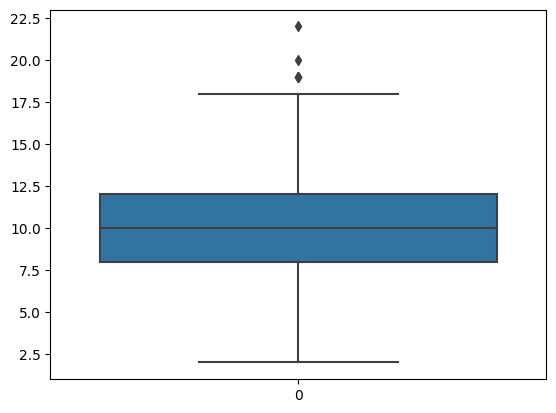

In [139]:
#start off with a boxplot of the Units Sold distribution
sns.boxplot(df3['Units Sold'])

There are some obvious outliers starting just above 18 units sold. We will identify and then drop these values from the data set so that it is easier to analyze.

In [140]:
#identify the outliers in the Units Sold column 
df3[df3['Units Sold'] > 18]

,Product,Region,Total Price,Units Sold,Sale Date
221,Product_5,Region_5,50.36,20.0,2022-08-10
232,Product_14,Region_3,104.27,19.0,2022-08-21
719,Product_50,Region_4,86.73,22.0,2023-12-21
912,Product_22,Region_8,116.49,19.0,2024-07-01
962,Product_13,Region_7,0.61,19.0,2024-08-20


In [141]:
#drop the outliers in the Units Sold column
df3.drop(df3[df3['Units Sold'] > 18].index, axis = 0, inplace = True)

<Axes: >

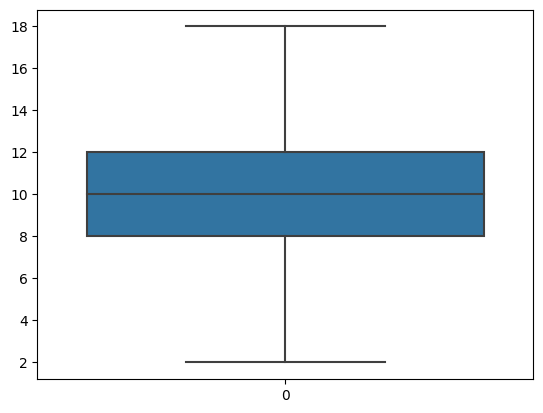

In [142]:
#re-create the boxplot without the outliers
sns.boxplot(df3['Units Sold'])

The boxplot above is fairly symmetric, meaning that the distribution is normal. Around 50% of product orders are for between 8-12 units at a time.

<Axes: >

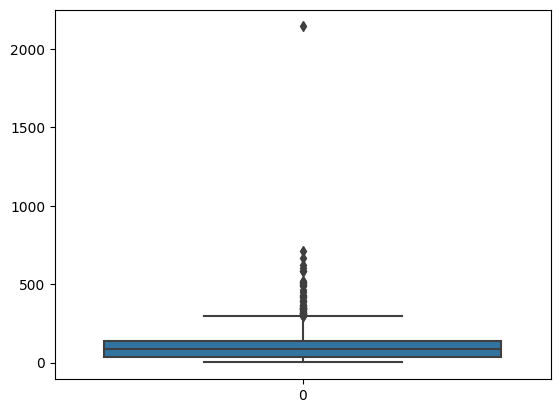

In [143]:
#next, create a boxplot of the Total Price distribution
sns.boxplot(df3['Total Price'])

While there are a lot of outliers, many of them are very close together. The only obvious major outlier is somewhere above $2000, so we will identify this value and drop it. 

In [144]:
#identify the outlier in the Total Price column
df3[df3['Total Price'] > 2000]

,Product,Region,Total Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


In [145]:
#drop the outlier from the Total Price column 
df3.drop(df3[df3['Total Price'] == 2143.3].index, axis = 0, inplace = True)

<Axes: >

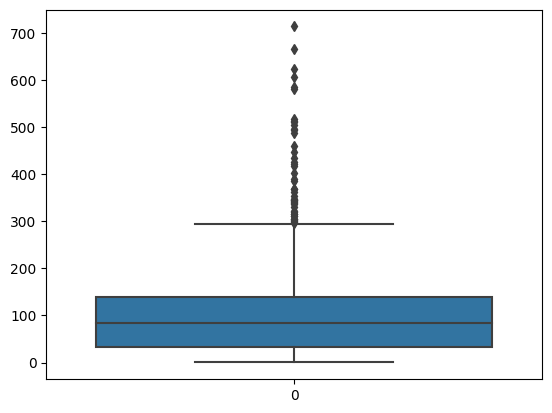

In [146]:
#re-create the boxplot without the outlier
sns.boxplot(df3['Total Price'])

Now that the most obvious outlier has been removed, it is easier to visualize the Total Price data. While there are still many outliers, I do not want to remove too many of the observations as it helps to see the bigger picture and price is an important metric to consider when giving sales recommendations to the company. 

In [147]:
#call cleaned-up data set 
df3.describe(include = 'all')

,Product,Region,Total Price,Units Sold,Sale Date
count,994,994,994.000000,994.000000,994
unique,51,11,NaN,NaN,994
top,Product_Unknown,Region_9,NaN,NaN,2022-01-01
freq,100,104,NaN,NaN,1
mean,NaN,NaN,104.720794,10.013707,NaN
std,NaN,NaN,98.982930,2.939339,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,33.635000,8.000000,NaN
50%,NaN,NaN,83.705000,10.000000,NaN
75%,NaN,NaN,138.106250,12.000000,NaN


Now that several outliers have been removed, we can see that the mean Total Price and Units Sold have changed slightly. However, the changes are not significant. The median Total price has also risen.

<Axes: xlabel='Units Sold', ylabel='Count'>

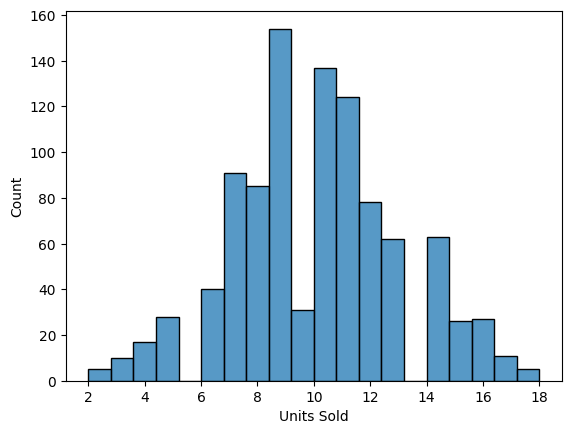

In [148]:
#start to visualize cleaned data by creating a histogram using Units Sold
sns.histplot(df3['Units Sold'])

As seen in the histogram above, the company sells most of its products in bundles of about 9-11 units and a fair amount of products in bundles ranging from about 6-8 and 12-14 units. The company does not typically sell many products in very small bundles (2-5) or very large bundles (15-18).

<Axes: xlabel='Total Price', ylabel='Count'>

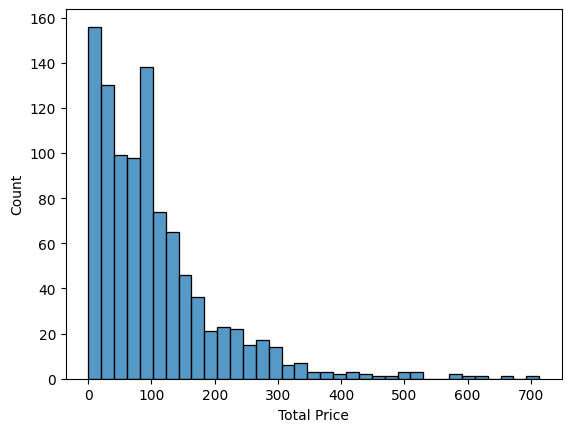

In [149]:
#create a histogram using Total Price
sns.histplot(df3['Total Price'])

As seen in the histogram above, the total price of each product order typically ranges from just over $0 to about $100. After that, the distribution slopes downward, showing that the company does not often sell its products for high prices. 

<Axes: xlabel='Product', ylabel='Count'>

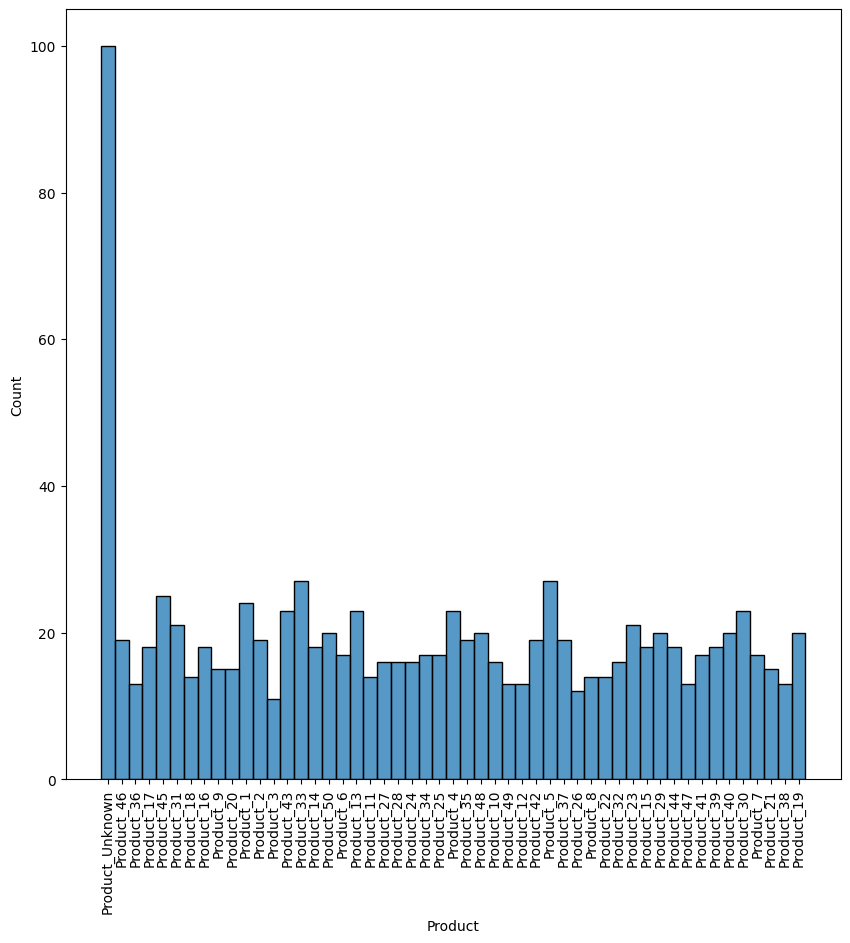

In [159]:
plt.figure(figsize = (10, 10))
plt.xticks(rotation = 90)
sns.histplot(df3['Product'])

As seen in the histogram above, many of the products (excluding the products unknown column) do not have a significant deviation in the number of times they were purchased. However, there are some that stand out as being purchased more often, such as products 5 and 33, and some that stand as as being purchased less often, such as products 2 and 26.

<Axes: xlabel='Region', ylabel='Count'>

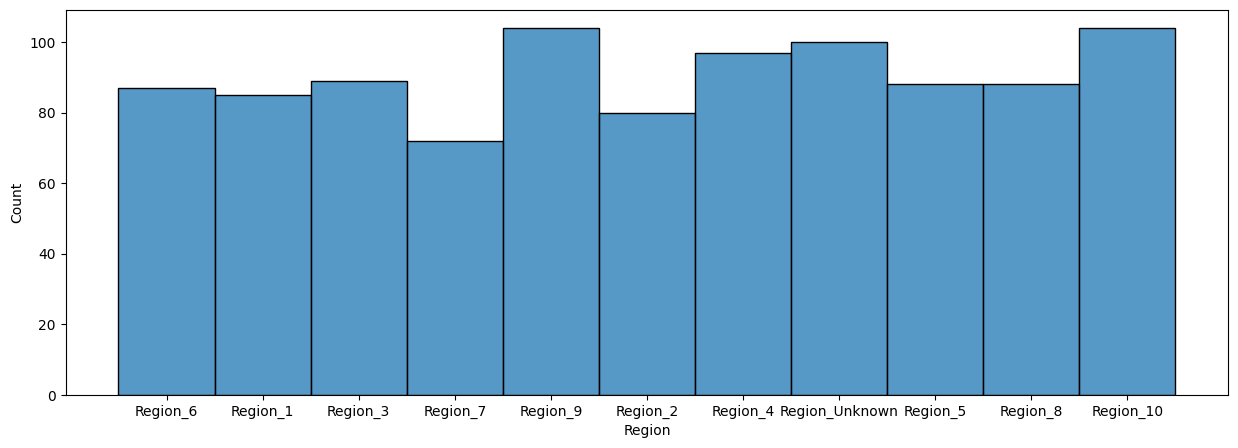

In [151]:
plt.figure(figsize = (15, 5))
sns.histplot(df3['Region'])

As seen in the histogram above, there was not a significant deviation in the number of times each region sold products. However, region 9 and 10 are higher than the others and region 7 is lower.

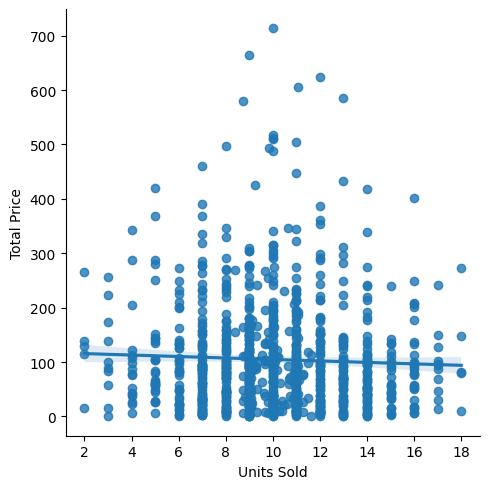

In [152]:
#next, create lmplot using the variables Units Sold and Total Price data to help visualize their relationship
sns.lmplot(data = df3, x = 'Units Sold', y = 'Total Price', fit_reg = True)

The lmplot above shows results that support the observations from our previous models. The highest amount of sales occurred for orders with between 9-11 units (and to a lesser extent, 6-8 and 12-14 units), and these orders are most often for $100 or less. However, there are still an adequate amount of orders that had a total price between $100 and about $200. It can also be observed that the regression line has a very slight negative slope, meaning that the number of units per order has little effect on the average total price per order.

<Axes: xlabel='Units Sold', ylabel='Region'>

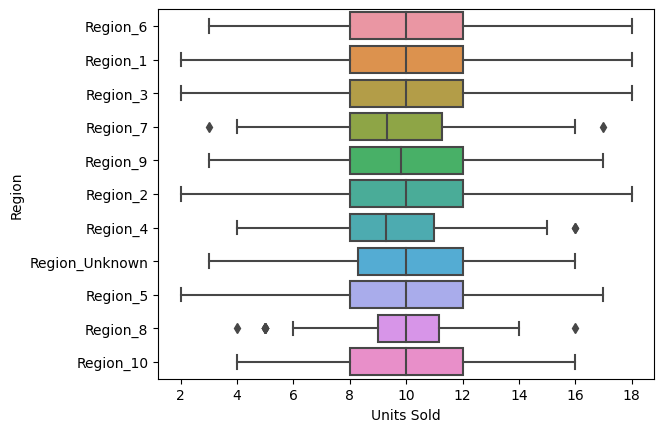

In [153]:
#create a boxplot using variables Units Sold and Region in order to visualize relationships between different groups of data
sns.boxplot(x = 'Units Sold', y = 'Region', data = df3)

This model shows that the median number of units sold typically remains the same irrespective of the region, which is about 10 units per order. The only (slight) exceptions to this are region 7 and region 4, which both have a median number of 9 units per order. There are also several regions with outliers, however they are not overly significant and there is no single region that has a notably large number of outliers.

<Axes: xlabel='Total Price', ylabel='Product'>

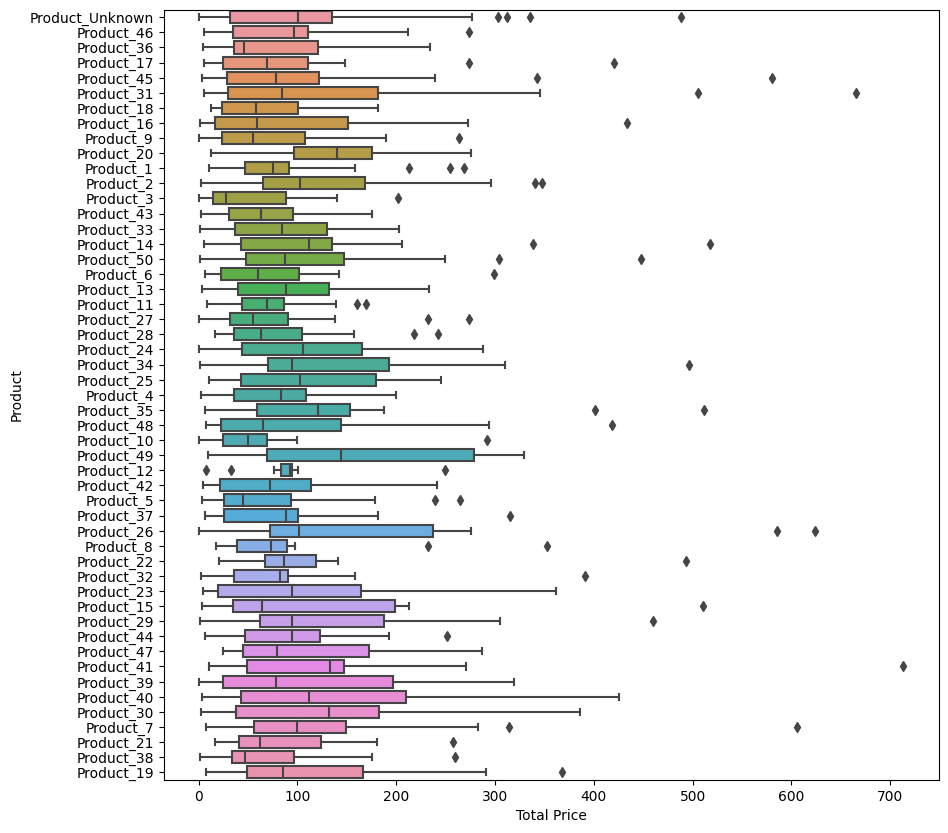

In [154]:
#next, create another boxplot using the variables Total Price and Product to further visualize data
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'Total Price', y = 'Product', data = df3)

The boxplot above visualizes the relationship between the total price of the order and the product number. Many of the products have a median total price of around $80, which is similar to the median of this data set. There are several products that have a median total price that is noticeably higher than other products. For example, product 49 has a total price distribution that stands out as higher than the others. On the opposite end of the spectrum, there are products that have noticeably lower median total prices that are well under $100, such as products 3 and 10.

<Axes: xlabel='Region', ylabel='Total Price'>

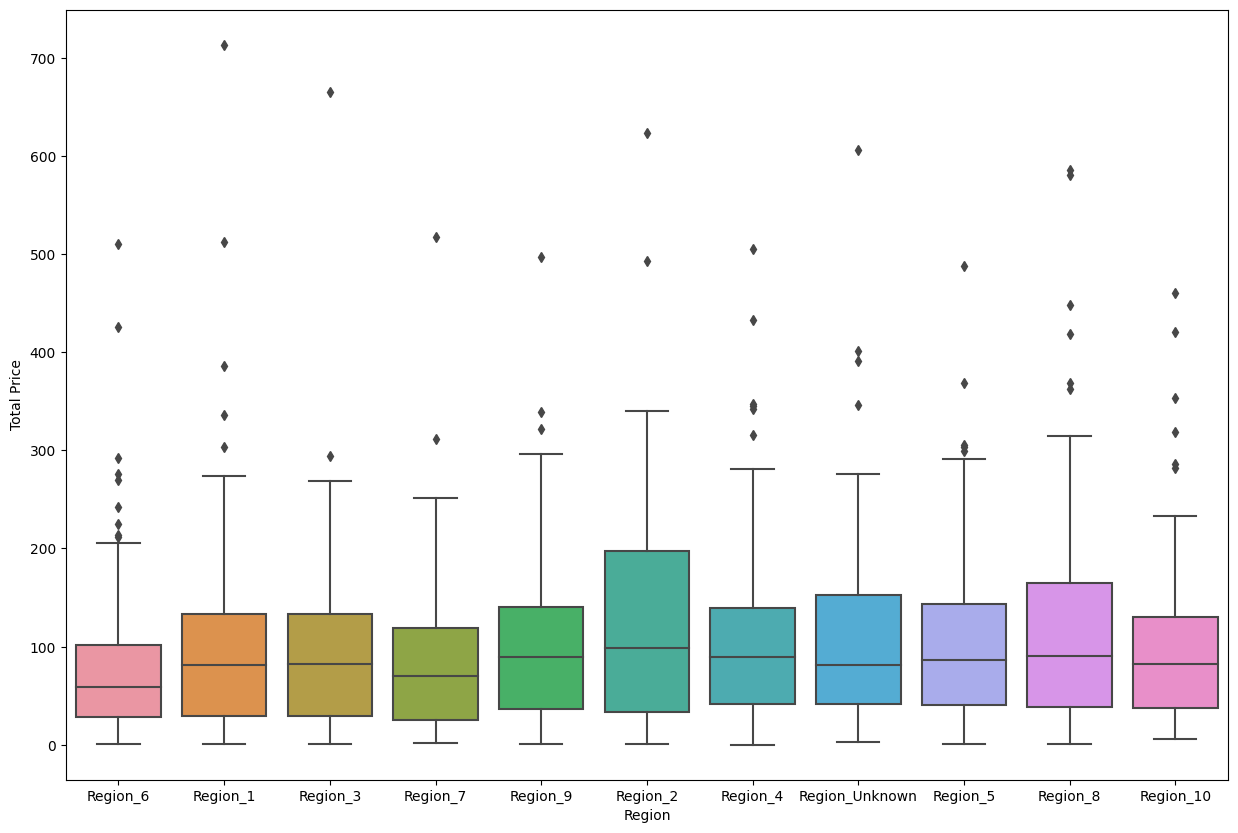

In [155]:
#create boxplot using the variables Region and Total Price
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Region', y = 'Total Price', data = df3)

The boxplot above supports trends that we have seen in other models. The majority of product orders cost anywhere from about $30 to $150 and the median total price per order per region appears to be fairly consistent with the median of the entire data set of $83.71, showing that region is not a huge factor in the total price of each product order. The only region that has a more noticeable difference in its total price distribution/average price is region 6. However, some variance is to be expected and we do not have enough information avaialable to determine potential causes. 

<Axes: xlabel='Region', ylabel='Units Sold'>

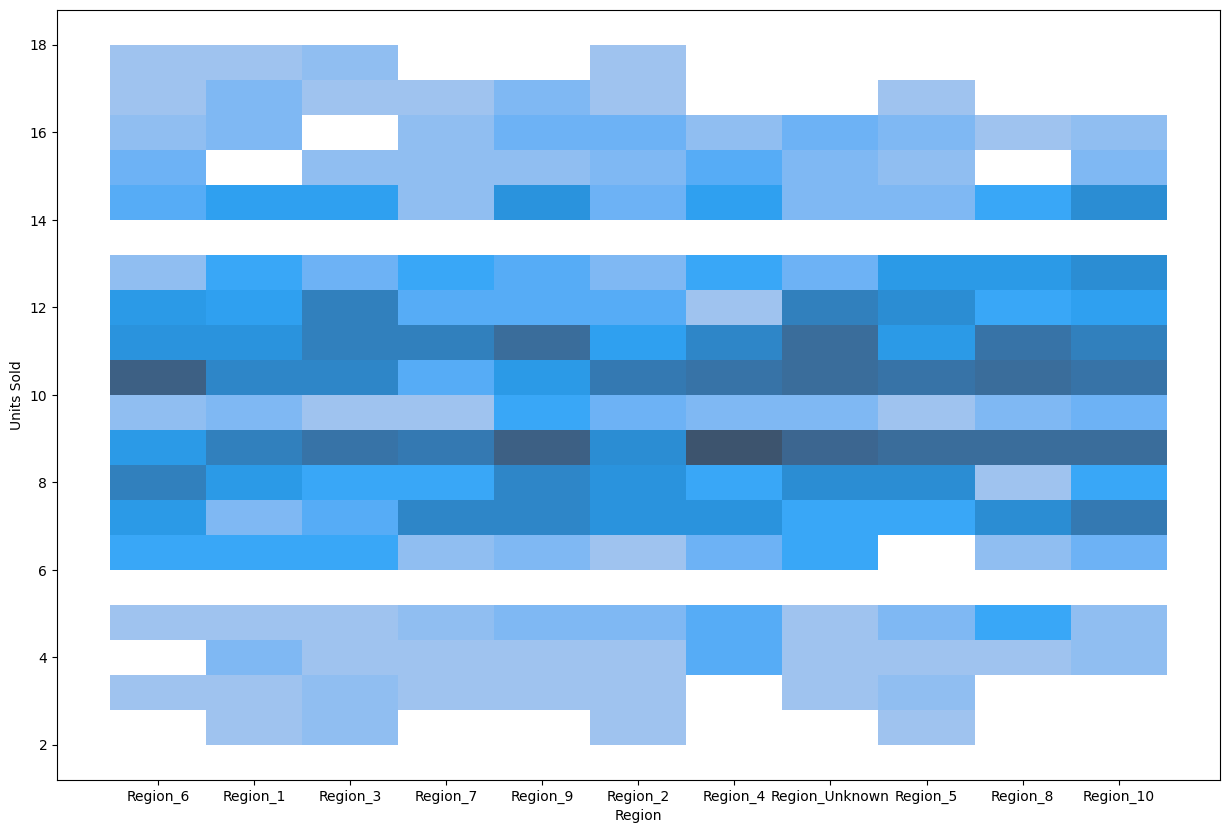

In [156]:
#create a histogram using the variables Region and Units Sold
plt.figure(figsize = (15,10))
sns.histplot(data = df3, x = 'Region', y = 'Units Sold')

The histogram above is simply another way to visualize our data and solidifies patterns that we have observed throughout this analysis. Across all regions, products are most commonly sold in bundles of 9-11 units, 

<Axes: xlabel='Region', ylabel='Product'>

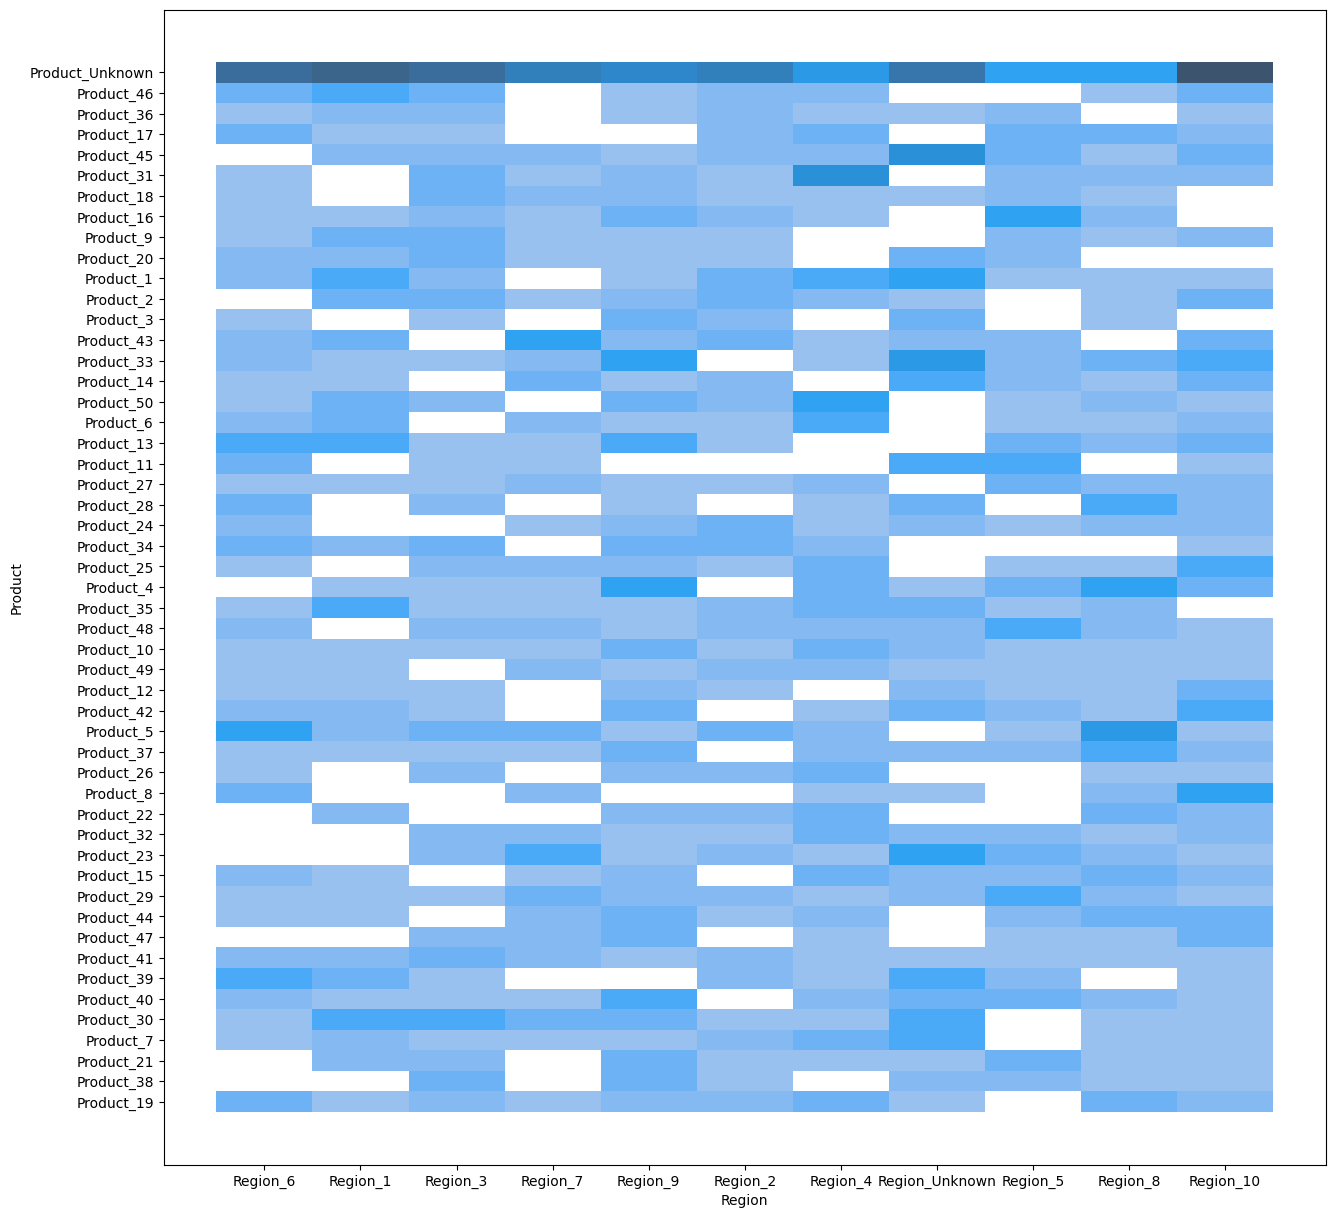

In [157]:
plt.figure(figsize = (15,15))
sns.histplot(data = df3, x = 'Region', y = 'Product')

The histogram above visualizes the products that each region most commonly sells. There are several observations to be made from this:
- Each region has about 1-2 products that perform better than the other ones, such as product 5 in region 8 and product 43 in region 7.
- There are some products that did not sell in 4-5 regions, such as product 3 and product 11.
- Some products did not perform overly well in any region (excluding region unknown), such as product 7 and product 9.
- Some products sold in almost every region, such as products 1, 45, and 49.

CONCLUSION

1. What conclusions can you draw about sales performance of various products and regions?
- The sales performance by region and product is summarized below and supported by the various models that have been created throughout this analysis:
    - Each region sold products between about 80-100 times in the year. Regions 9 and 10 sold products more than 100 times throughout the year, while region 7 sold less than 80 times throughout the year.
    - Each region has about the same median units sold per product order, which is 10. The range in which many of the regions sold products most often was in bundles of 8-12 units.
    - Regions 2 and 8 tend to sell products for the highest price. However, the median for all regions is still very similar.
    - As explained in earlier sections, each region has a couple top-performing products, some products do not sell in several difference regions, some sold in almost every region, and some products, while they did sell in many regions, did not do well in terms of sales numbers.
    - Products tend to sell for similar prices irrespective of how many units are sold at once.
    - Products 5 and 33 sold the most times, however they did not tend to sell for the highest prices. Products such as product 49 sold for higher prices, but appeared less times in the data set.

2. What recommendations do you have for the business?
- The company should consider changing the pricing of their products. Buying 2-6 units costs the same or more as purchasing a higher number of units, which may suggest that the company offers buying in bulk discount programs. However, keeping the price so high when buying only a couple units may be deterring potential customers, so lowering the price can encourage more sales and revenue.
- The company should increase their marketing spend on products that are top-performers in their region. There are only about 1-2 top products per region, so the company can focus on these and capitalize upon their success.
- The company should consider dropping products that are not selling in each region/multiple regions. It is not profitable to continue offering products that have not been sold at all over the course of the year.
- The company should implement more effective data governance policies. The number of missing values in this data set suggests that they currently may not be placing much emphasis on the collection and analysis of sales data. Improving these methods will give a more clear picture of their sales information and will allow for better decision-making.


3. Describe your data cleaning approach. How and why did you decide on which cleaning teachniques to use?
- This was described throughout the analysis and a short summary is given below:
    - My data cleaning approach centered around keeping as much data as I could in order to see the 'bigger picture' of the sales data given.
    - I did not feel that the 'Price' column name was clear enough, as sometimes this means price per unit instead of the total price of the order, so I renamed it to 'Total Price' for clarity.
    - I started with identifying all of the missing values.
    - In the 'Product' and 'Region' categories, I filled them with Product_unknown and Region_unknown respectively.
    - I then replaced missing values in the 'Units Sold' column with the average number of units sold per product category, and replaced missing values in the 'Total Price' column with the average price per product category. I believed this would give the most accurate representation of the data.
    - After all of the missing values were filled, I dropped the duplicates to make the data set more reliable.
    - I only removed the most obvious outliers in order to create a more accurate and easier-to-understand visualization.
    -  I then proceded with the visualization of the data through a variety of models including box plots, lm plots, and histograms.